In [ ]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [ ]:
print(keras. __version__)

2.15.0


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)  # Use the top 10,000 words only

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
maxlen = 500  # Cut reviews after 500 words
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [ ]:
x_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [ ]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(25000, 500) (25000,)
(25000, 500) (25000,)


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=maxlen))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1411713 (5.39 MB)
Trainable params: 1411713 (5.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

Epoch 1/3
313/313 [==============================] - 607s 2s/step - loss: 0.4957 - accuracy: 0.7561 - val_loss: 0.3483 - val_accuracy: 0.8472
Epoch 2/3
313/313 [==============================] - 582s 2s/step - loss: 0.2923 - accuracy: 0.8853 - val_loss: 0.3445 - val_accuracy: 0.8502
Epoch 3/3
313/313 [==============================] - 582s 2s/step - loss: 0.2145 - accuracy: 0.9183 - val_loss: 0.3221 - val_accuracy: 0.8666


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

782/782 [==============================] - 137s 176ms/step - loss: 0.3341 - accuracy: 0.8629
Test Loss: 0.33408981561660767
Test Accuracy: 0.8628799915313721


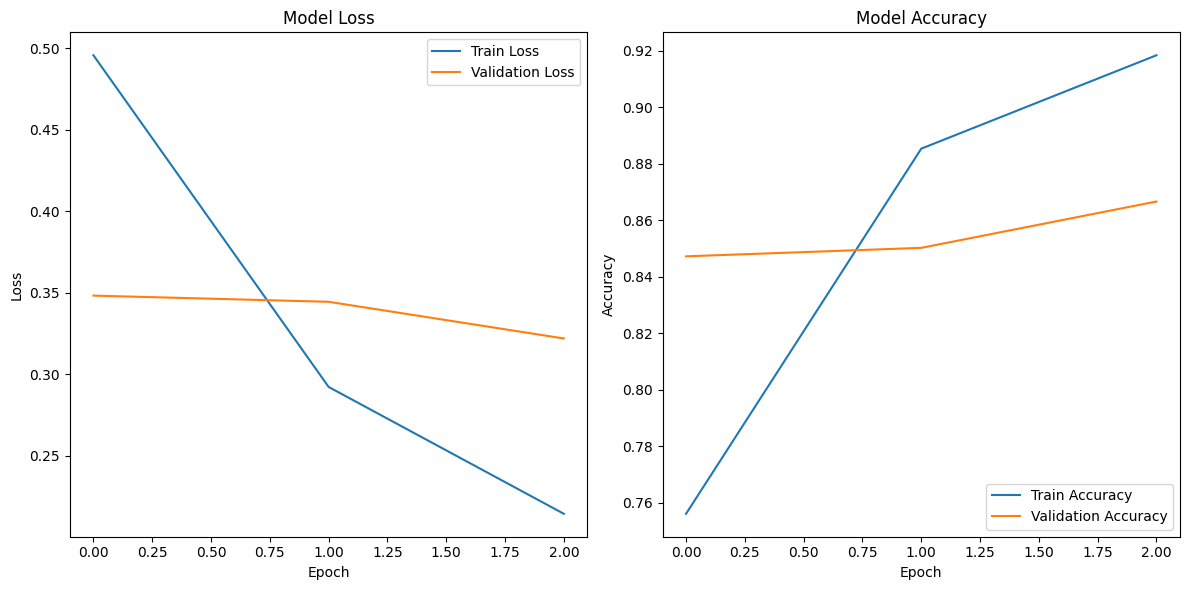

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
# Select a single test review (ensure it's from x_test)
test_review = x_test[0]  # Single review
test_review_label = y_test[0]  # Corresponding label

# Reshape the review to add batch dimension
test_review_reshaped = np.expand_dims(test_review, axis=0)

# Predict the sentiment
prediction = model.predict(test_review_reshaped)

# Display the result
sentiment = "Positive" if prediction[0][0] > 0.5 else "Negative"
print(f"Review (encoded): {test_review}\nActual Label: {'Positive' if test_review_label == 1 else 'Negative'}\nPrediction: {sentiment} ({prediction[0][0]:.2f})\n")


1/1 [==============================] - 0s 424ms/step
Review (encoded): [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 